<a href="https://colab.research.google.com/github/anderomeda371/firstrepo/blob/main/Clustering_with_Dendogram(scipy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [77]:
dataset=pd.read_csv("/content/country.csv")
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [78]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [79]:
#check for null
dataset.isnull().sum()
from matplotlib.pyplot import xticks
%matplotlib inline

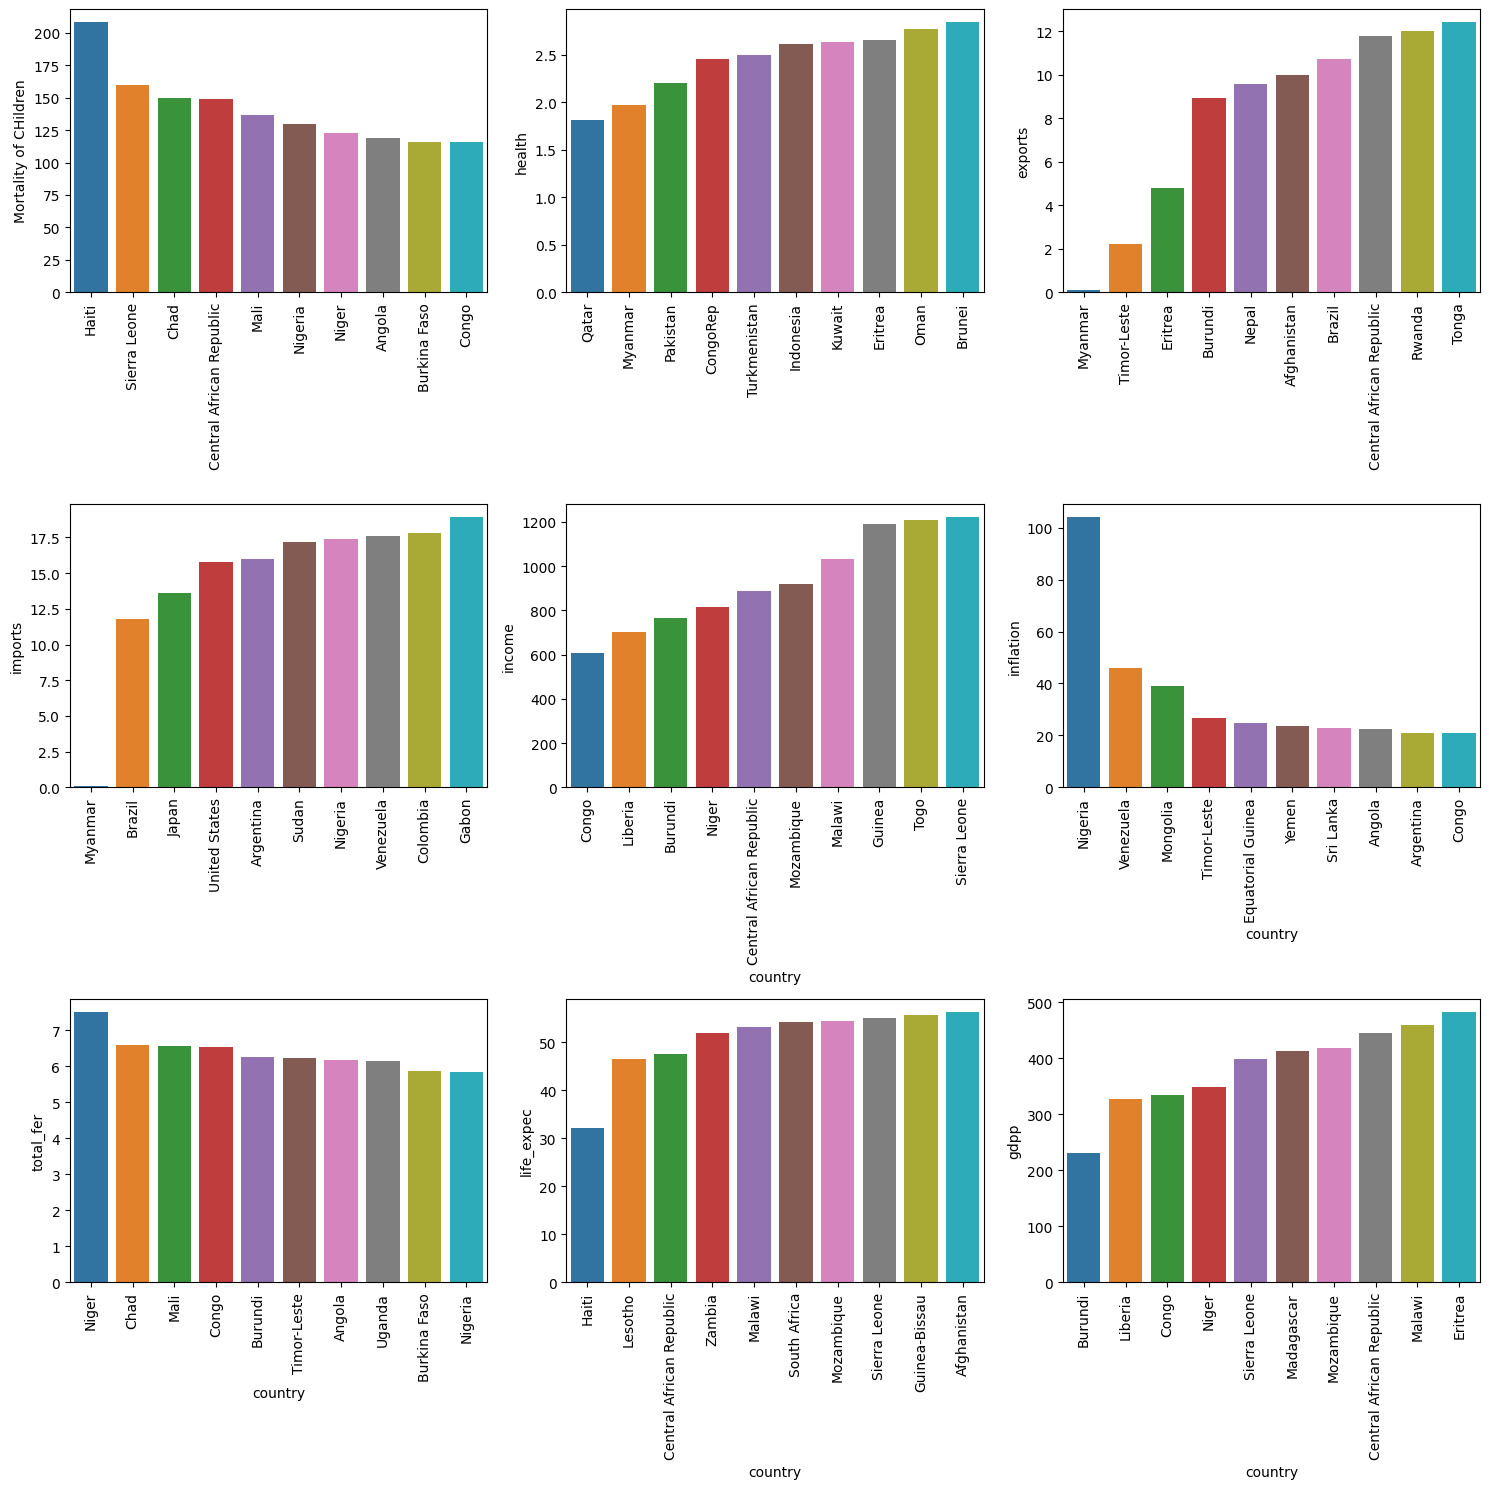

In [80]:
#check country situation (top 10 counter )

fig,ax=plt.subplots(3,3,figsize=(15,15))
fig,ax
#childmortality per country
childMor_top10=dataset[['country','child_mort']].sort_values("child_mort",ascending=False).head(10)
plt1=sns.barplot(data=childMor_top10,x="country",y="child_mort",ax=ax[0,0])
plt1.set(ylabel="Mortality of CHildren",xlabel="")
#health per country
health_top10=dataset[["health","country"]].sort_values("health",ascending=True).head(10)
plt1=sns.barplot(data=health_top10,x="country",y="health",ax=ax[0,1])
# plt1=sns.barplot(data=health_top10,x="country",y="health",ax=ax[0,1])
plt1.set(ylabel="health",xlabel="")

export_top10=dataset[["exports","country"]].sort_values("exports",ascending=True).head(10)
plt1=sns.barplot(data=export_top10,x="country",y="exports",ax=ax[0,2])
# plt1=sns.barplot(data=health_top10,x="country",y="health",ax=ax[0,1])
plt1.set(ylabel="exports",xlabel="")

import_top10=dataset[["imports","country"]].sort_values("imports",ascending=True).head(10)
plt1=sns.barplot(data=import_top10,x="country",y="imports",ax=ax[1,0])
# plt1=sns.barplot(data=health_top10,x="country",y="health",ax=ax[0,1])
plt1.set(ylabel="imports",xlabel="")

income_top10=dataset[["income","country"]].sort_values("income",ascending=True).head(10)
plt1=sns.barplot(data=income_top10,x="country",y="income",ax=ax[1,1])
plt1.set(ylabel="income")

inflation_top10=dataset[["inflation","country"]].sort_values("inflation",ascending=False).head(10)
plt1=sns.barplot(data=inflation_top10,x="country",y="inflation",ax=ax[1,2])
plt1.set(ylabel="inflation")

totalfer_top10=dataset[["total_fer","country"]].sort_values("total_fer",ascending=False).head(10)
plt1=sns.barplot(data=totalfer_top10,x="country",y="total_fer",ax=ax[2,0])
plt1.set(ylabel="total_fer")

lifeExpec_top10=dataset[["life_expec","country"]].sort_values("life_expec",ascending=True).head(10)
plt1=sns.barplot(data=lifeExpec_top10,x="country",y="life_expec",ax=ax[2,1])
plt1.set(ylabel="life_expec")

gdpp_top10=dataset[["gdpp","country"]].sort_values("gdpp",ascending=True).head(10)
plt1=sns.barplot(data=gdpp_top10,x="country",y="gdpp",ax=ax[2,2])
plt1.set(ylabel="gdpp")
# plt.figure(figsize=(15,15))
# plt.subplot(3,3,1)
# sns.barplot(data=childMor_top10,x="country",y="child_mort")
# plt.xticks(rotation=90)

for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=90)
# plt.subplot

plt.tight_layout()

<ipython-input-81-94cc65e4a2e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")


<Axes: >

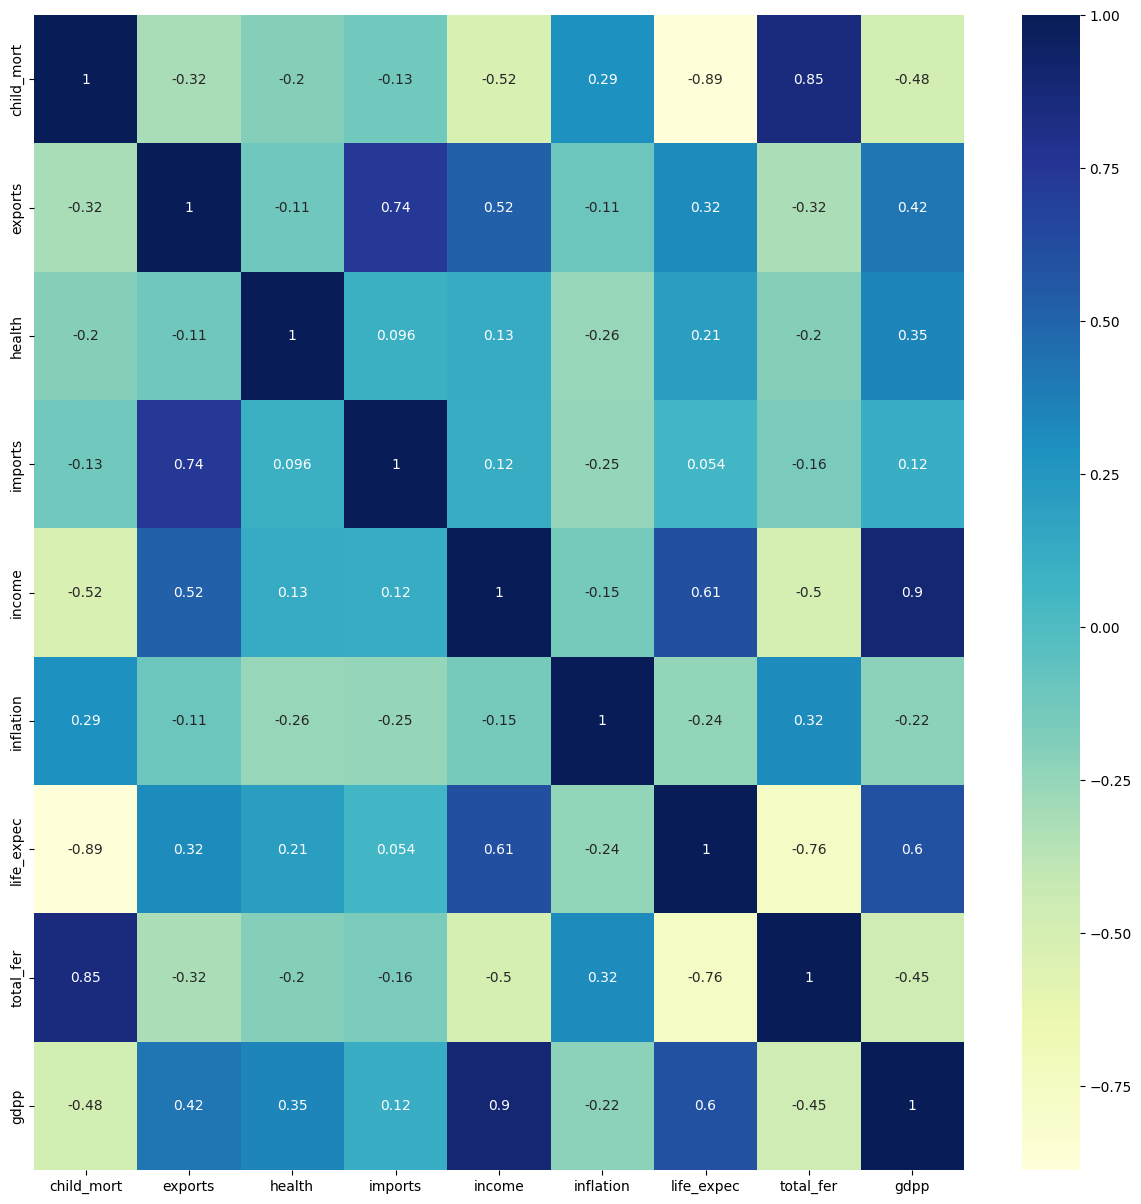

In [81]:
#plot heatmap to find correlated variables
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")

In [82]:
#there are a lot of variables that correlated with each other
dataset.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

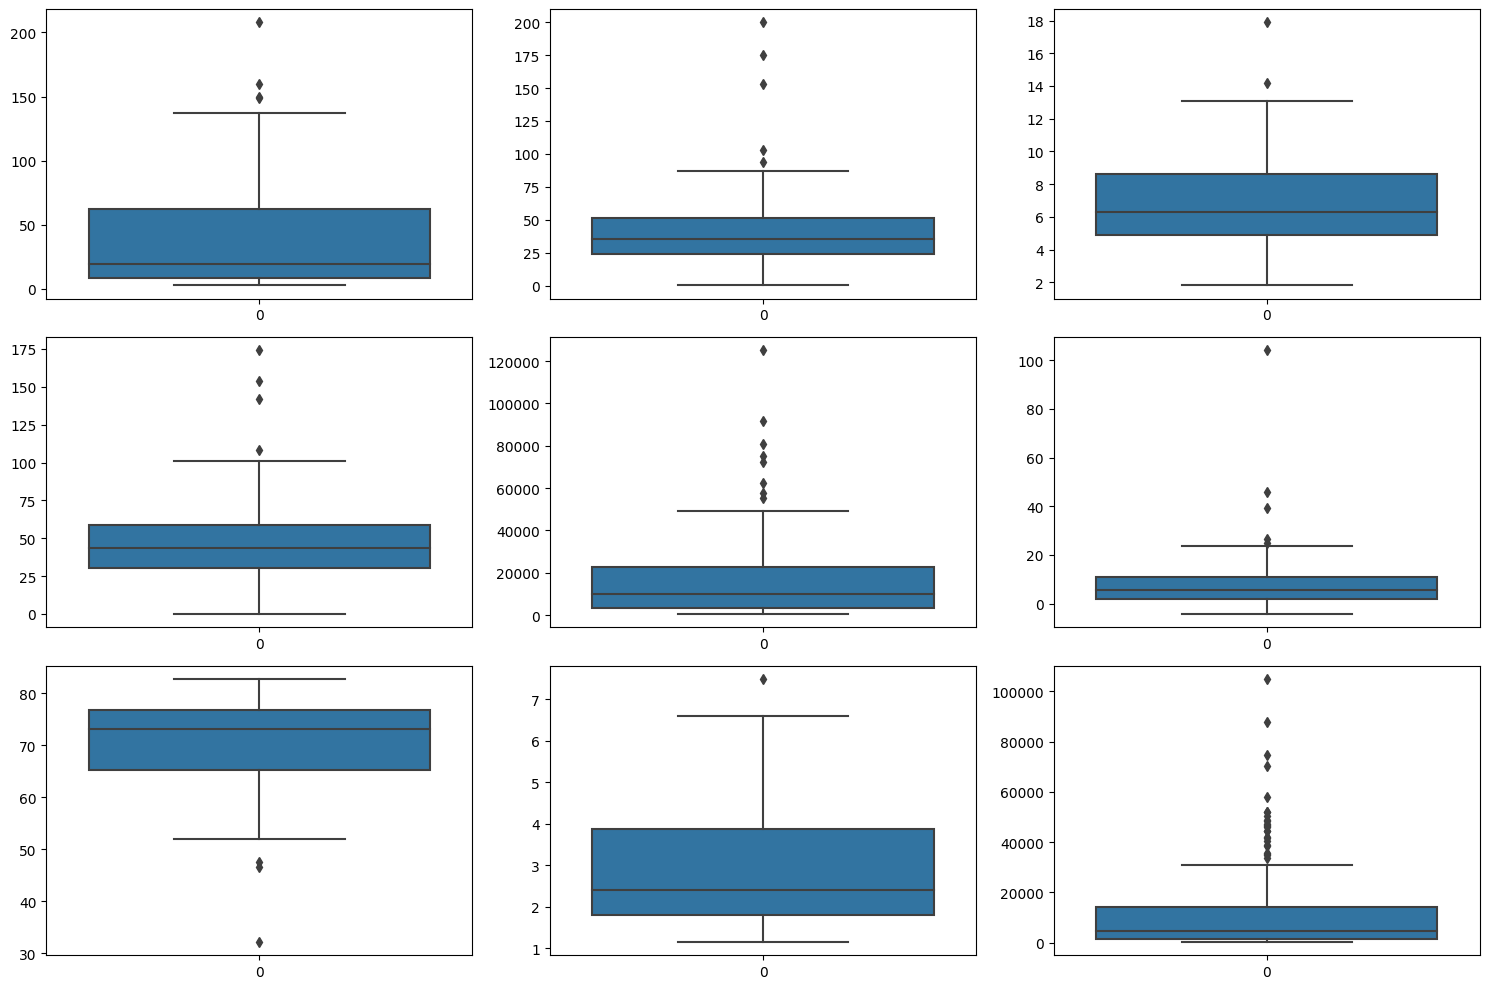

In [83]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
plt1=sns.boxplot(data=dataset.child_mort,ax=ax[0,0])
plt1=sns.boxplot(data=dataset.exports,ax=ax[0,1])
plt1=sns.boxplot(data=dataset.health,ax=ax[0,2])
plt1=sns.boxplot(data=dataset.imports,ax=ax[1,0])
plt1=sns.boxplot(data=dataset.income,ax=ax[1,1])
plt1=sns.boxplot(data=dataset.inflation,ax=ax[1,2])
plt1=sns.boxplot(data=dataset.life_expec,ax=ax[2,0])
plt1=sns.boxplot(data=dataset.total_fer,ax=ax[2,1])
plt1=sns.boxplot(data=dataset.gdpp,ax=ax[2,2])

for ax in fig.axes:
  plt.sca(ax)


plt.tight_layout()

In [84]:
dataset2=dataset.copy()

dataset2.head()

dataset2.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [85]:
#control outliers and terminate them
percentile=dataset2["child_mort"].quantile([0.05,0.95]).values
dataset2["child_mort"][dataset["child_mort"]<=percentile[0]]=percentile[0]
dataset2["child_mort"][dataset2["child_mort"]>=percentile[1]]=percentile[1]


percentile=dataset2["exports"].quantile([0.05,0.95]).values
dataset2["exports"][dataset["exports"]<=percentile[0]]=percentile[0]
dataset2["exports"][dataset2["exports"]>=percentile[1]]=percentile[1]

percentile=dataset2["health"].quantile([0.05,0.95]).values
dataset2["health"][dataset["health"]<=percentile[0]]=percentile[0]
dataset2["health"][dataset2["health"]>=percentile[1]]=percentile[1]

percentile=dataset2["imports"].quantile([0.05,0.95]).values
dataset2["imports"][dataset["imports"]<=percentile[0]]=percentile[0]
dataset2["imports"][dataset2["imports"]>=percentile[1]]=percentile[1]

percentile=dataset2["income"].quantile([0.05,0.95]).values
dataset2["income"][dataset["income"]<=percentile[0]]=percentile[0]
dataset2["income"][dataset2["income"]>=percentile[1]]=percentile[1]

percentile=dataset2["inflation"].quantile([0.05,0.95]).values
dataset2["inflation"][dataset["inflation"]<=percentile[0]]=percentile[0]
dataset2["inflation"][dataset2["inflation"]>=percentile[1]]=percentile[1]

percentile=dataset2["life_expec"].quantile([0.05,0.95]).values
dataset2["life_expec"][dataset["life_expec"]<=percentile[0]]=percentile[0]
dataset2["life_expec"][dataset2["life_expec"]>=percentile[1]]=percentile[1]

percentile=dataset2["total_fer"].quantile([0.05,0.95]).values
dataset2["total_fer"][dataset["total_fer"]<=percentile[0]]=percentile[0]
dataset2["total_fer"][dataset2["total_fer"]>=percentile[1]]=percentile[1]

percentile=dataset2["gdpp"].quantile([0.05,0.95]).values
dataset2["gdpp"][dataset["gdpp"]<=percentile[0]]=percentile[0]
dataset2["gdpp"][dataset2["gdpp"]>=percentile[1]]=percentile[1]




<ipython-input-85-c3caf90ccb33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["child_mort"][dataset["child_mort"]<=percentile[0]]=percentile[0]
<ipython-input-85-c3caf90ccb33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["child_mort"][dataset2["child_mort"]>=percentile[1]]=percentile[1]
<ipython-input-85-c3caf90ccb33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["exports"][dataset["exports"]<=perce

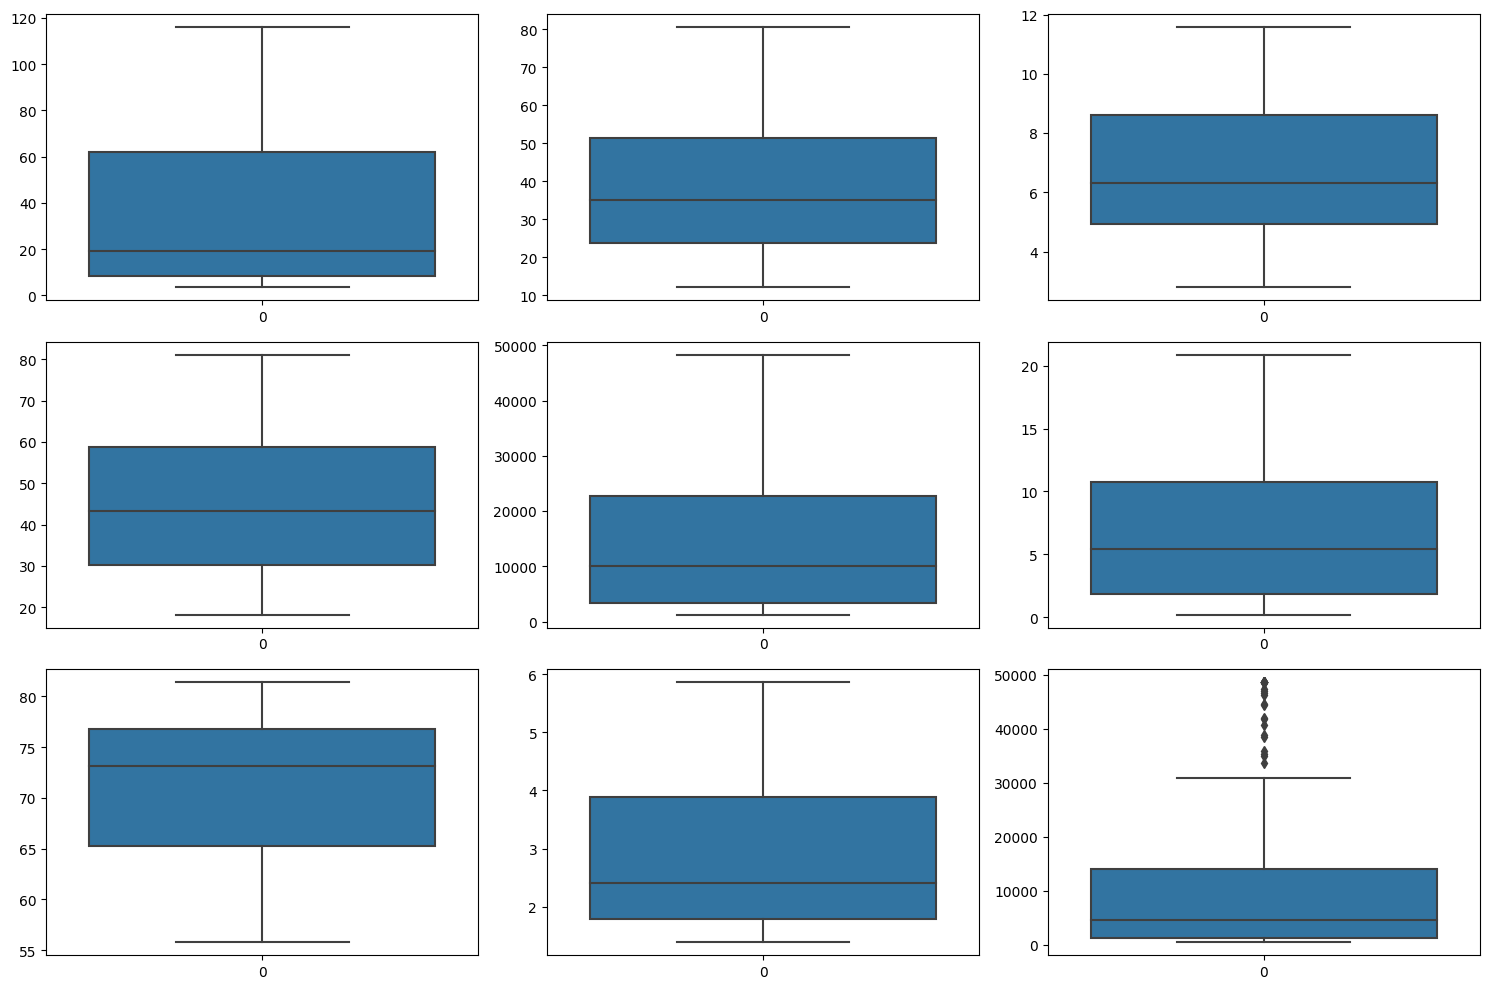

In [86]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
plt1=sns.boxplot(data=dataset2.child_mort,ax=ax[0,0])
plt1=sns.boxplot(data=dataset2.exports,ax=ax[0,1])
plt1=sns.boxplot(data=dataset2.health,ax=ax[0,2])
plt1=sns.boxplot(data=dataset2.imports,ax=ax[1,0])
plt1=sns.boxplot(data=dataset2.income,ax=ax[1,1])
plt1=sns.boxplot(data=dataset2.inflation,ax=ax[1,2])
plt1=sns.boxplot(data=dataset2.life_expec,ax=ax[2,0])
plt1=sns.boxplot(data=dataset2.total_fer,ax=ax[2,1])
plt1=sns.boxplot(data=dataset2.gdpp,ax=ax[2,2])

for ax in fig.axes:
  plt.sca(ax)


plt.tight_layout()

In [87]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

variables=[ 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
dataset2[variables]=sc.fit_transform(dataset2[variables])

dataset2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,Albania,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,Algeria,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,Angola,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,Antigua and Barbuda,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.210851,0.367649,-0.601739,0.401988,-0.869580,-0.703080,-0.976912,0.402811,-0.597903
163,Venezuela,-0.546168,-0.545274,-0.736567,-1.492398,0.050557,2.215708,0.570166,-0.315484,0.099032
164,Vietnam,-0.374352,1.648767,0.028782,1.908949,-0.765003,0.813091,0.283208,-0.678119,-0.707771
165,Yemen,0.540147,-0.469617,-0.629498,-0.600825,-0.765683,2.215708,-0.415473,1.218738,-0.707771


In [98]:
#PCA loading for feature reduction

from sklearn.decomposition import PCA

pca=PCA(svd_solver="randomized",random_state=42)

In [99]:
#featue variable=x,repsonse variable y

X=dataset2.drop("country",axis=1)

y=dataset2["country"]

In [100]:
pca.fit(X)

PCA(random_state=42, svd_solver='randomized')

In [101]:
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [102]:
colnames=list(X.columns)
colnames

pca_df=pd.DataFrame({"pca0":pca.components_[0],"pca1":pca.components_[1],"feature":colnames})
pca_df

,pca0,pca1,feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income
5,-0.225176,0.079882,inflation
6,0.431881,0.129883,life_expec
7,-0.406693,-0.008781,total_fer
8,0.393765,0.184042,gdpp


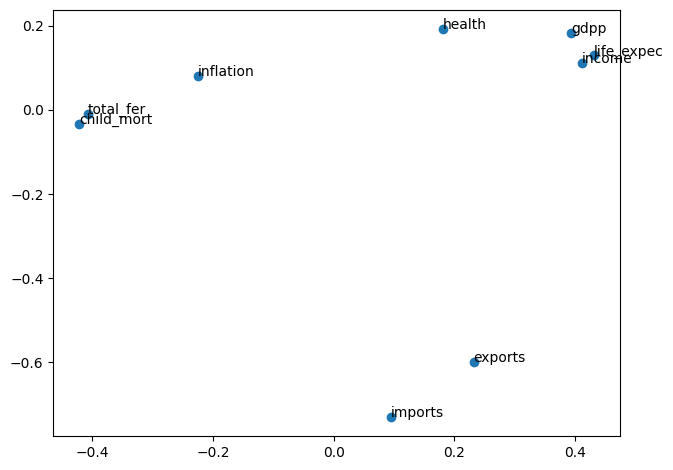

In [111]:
plt.scatter(pca_df["pca0"],pca_df["pca1"])

plt.tight_layout()

for (i,text) in enumerate(pca_df.feature):
  plt.annotate(text,(pca_df.pca0[i],pca_df.pca1[i]))